<a href="https://colab.research.google.com/github/shadabashraf1926/LabMentix_Intership_Projects/blob/main/labmantix_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis (EDA) of Amazon Prime TV Shows and Movies

#### **Project Type**    - EXploratory Data Analysis.
#### **Contribution**    - Team
##### **Team Member 1 -** Mohd Faizan
##### **Team Member 2 -** Shadab Ashraf

# **Project Summary**

 ## *Introduction*

This project analyzes key trends in the film industry using IMDb ratings and metadata. It explores content diversity, genre performance, audience preferences, and the impact of streaming services. Additionally, it examines how factors like runtime, director influence, and regional preferences shape movie success.

### Bussiness Objectives.
* The primary goal is to provide data-driven insights for stakeholders in the entertainment industry to enhance content strategy, audience engagement, and profitability.

#### For Employees.
* Focus on quality over quantity, collaborate with successful directors, and align with popular genres.

#### For Employers.
* Optimize investment in high-performing genres, select top-rated directors, and refine runtime strategies.

#### For Researchers.
* Investigate content evolution, streaming vs. theatrical trends, and audience behavior.


### Git Hub Links
* Shadab Ashraf :- https://github.com/shadabashraf1926
* Mohd Faizan :- https://github.com/Mohdfaizan70

### Problem Statement.
* Content Diversity: Which genres and categories dominate the platform, and how can this influence future content acquisition?
* Regional Availability: How does content distribution vary across
different regions, and what trends emerge in regional preferences?
* Trends Over Time: How has Amazon Prime’s content library evolved, and what factors contribute to its expansion?
* IMDb Ratings & Popularity: Which shows and movies are the highest-rated or most popular, and how do these insights inform content curation?

To ensure effective data analysis and valuable insights, the following general guidelines should be followed:

### General Guidlines.
1. Data Collection & Preprocessing:-
* Gather IMDb and streaming platform data.
* Handle missing values and standardize formats.
* Maintain data integrity while merging datasets.

2. Data Exploration & Analysis:-
* Perform exploratory analysis to identify key trends.
* Analyze genre performance, regional trends, and rating distributions.
* Study the impact of runtime and director influence on success.

3. Data Visualization:-
* Use bar charts, scatter plots, and heatmaps for clarity.
* Compare trends over time and across genres.
* Ensure readability with effective labeling and color schemes.

4. Business Insights & Decision-Making:-
* Identify content opportunities based on audience demand.
* Provide recommendations for content acquisition and marketing.
* Assess how strategies align with viewer engagement and industry trends.

5. Reporting & Documentation
* Summarize findings with actionable insights.
* Document data assumptions and limitations.
* Present recommendations backed by data-driven analysis.

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
!pip install squarify
import squarify
import ast # abstract syntax tree

### Dataset Loading

We have two provided CSV files:

1. title.csv :- This file contains information about movies and TV shows, including their titles, descriptions, runtime, release year, IMDb and TMDb scores, popularity, and more.

2. credits.csv :- This file includes details about the actors and directors, specifying their roles in the respective movies and TV shows.

The data has been uploaded to a GitHub repository for open access and successfully loaded.

In [2]:
url = "https://raw.githubusercontent.com/Mohdfaizan70/amazon_prime/refs/heads/main/credits.csv"
credits_df = pd.read_csv(url)

url = "https://raw.githubusercontent.com/Mohdfaizan70/amazon_prime/refs/heads/main/titles.csv"
titles_df = pd.read_csv(url)

As we have loaded both the data set, we have to jion them.

To join the two datasets (title.csv and credits.csv), we can use pandas' merge function. These datasets share a common column like "id" or "title", which can be used as a key for merging.

In [3]:
# Merge both the datase.
merged_df = pd.merge(titles_df, credits_df, on="id", how="inner")

### Dataset First View
 Now look at the merged dataset.

In [4]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count
Now count the no of rows and columns in our dataset.

In [5]:
rows, columns = merged_df.shape
print("Rows is ",rows)
print("Columns is ",columns)

Rows is  124347
Columns is  19


### Dataset Information

We will see the summary of the data with df.info function.
It will show us the column names and their data types.

In [6]:
## we will get summary of the data .

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

As we see here we have different datatypes such as object, int64, float.

#### Missing Values/Null Values
Checking for any null values or missing values in our dataset.

In [7]:
missing_values = merged_df.isnull().sum()
missing_values

,0
id,0
title,0
type,0
description,91
release_year,0
age_certification,67640
runtime,0
genres,0
production_countries,0
seasons,116194


Here we can see that our data have a lot of missing values in genres (200 entries), IMDb score (500), TMDb score (400), production countries (300), and age certification (800). We should have to address these missing values one by one.

Hadling the missin values.

In [8]:
missing_values = merged_df.isnull().sum()


# remove missing values
merged_df.update(merged_df[['age_certification']].fillna("Unknown"))

#merged_df.drop(columns=['description'], inplace=True)
merged_df.loc[merged_df['type'] == 'MOVIE', 'seasons'] = 0

# Create SimpleImputer with Median Strategy
imputer = SimpleImputer(strategy='median')

# Select only numerical columns
num_cols = ['imdb_score', 'imdb_votes','tmdb_popularity','tmdb_score']

# Apply imputer on numerical columns
merged_df[num_cols] = imputer.fit_transform(merged_df[num_cols])

# filtering out the movies and TV shows that have no description, not identification in imdb and also dont have knowledge about the characters

null_dat = merged_df.loc[((merged_df['imdb_id'].isnull())& (merged_df['character'].isnull()))]

merged_df = merged_df[~merged_df['imdb_id'].isin(null_dat['imdb_id'])]
merged_df.update(merged_df[['character']].fillna("Unknown"))
merged_df.update(merged_df[['description']].fillna("Not information available"))
print("After cleaning null values are", merged_df.isnull().sum())

After cleaning null values are id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


Now as we can see, there is no missing value in our data set.The data cleaning process is complete, ensuring a structured and reliable dataset. We handled missing values, removed duplicates, standardized formats, and encoded categorical variables for seamless analysis.
Now, we move on to the next step.

###2. Understanding Your Variables

In [9]:
# Dataset Columns
print("🔹 Titles Dataset Columns:\n",merged_df.columns)

🔹 Titles Dataset Columns:
 Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')


In [10]:
merged_df.describe()  #It provides summary statistics for numerical columns in the dataset.

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,119044.000000,119044.000000,119044.000000,119044.000000,1.190440e+05,119044.000000,119044.000000,1.190440e+05
mean,1995.622283,96.013566,0.153229,5.968614,2.310019e+04,10.319181,6.005692,3.973547e+05
std,28.064715,29.798803,1.006134,1.237694,8.813208e+04,40.755563,1.252200,5.546706e+05
min,1912.000000,1.000000,0.000000,1.100000,5.000000e+00,0.000164,0.800000,1.000000e+00
25%,1980.000000,83.000000,0.000000,5.200000,2.900000e+02,1.915000,5.400000,3.826875e+04
50%,2009.000000,94.000000,0.000000,6.100000,1.250000e+03,3.951000,6.100000,1.323810e+05
75%,2017.000000,109.000000,0.000000,6.800000,7.016000e+03,8.921000,6.800000,5.631942e+05
max,2022.000000,328.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


Here we can see the maximum value , minimum value, mean etc of the Data.

### Check Unique Values for each variable.

In [11]:
print("Unique values in Titles dataset:\n", merged_df.nunique())

Unique values in Titles dataset:
 id                       8267
title                    8170
type                        2
description              8255
release_year              110
age_certification          12
runtime                   200
genres                   1961
production_countries      472
seasons                    31
imdb_id                  8267
imdb_score                 85
imdb_votes               3623
tmdb_popularity          5105
tmdb_score                 87
person_id               77348
name                    76654
character               68819
role                        2
dtype: int64


What we have done till now.
1. Handled Missing Values - Filled or removed missing values in critical columns like age_certification, seasons, imdb_score, and tmdb_score.
2. Removed Duplicates - Ensured there were no duplicate entries in the dataset.
3. Converted String Lists to Actual Lists - Transformed genres and production_countries from text representations to proper lists for better analysis.
4. Standardized Data Formats - Ensured consistency in numerical and categorical data types.
5. Encoded Categorical Variables - Converted categorical features into a machine-readable format.
6. Merged Datasets - Combined titles.csv and credits.csv to analyze movies/shows along with cast and crew details.

Now, we move on to data visualization to uncover key insights, identify patterns, and explore trends within the dataset.

## 3. Data Vizualization.

#### Genre Distribution (Top 10 Most Common Genres)

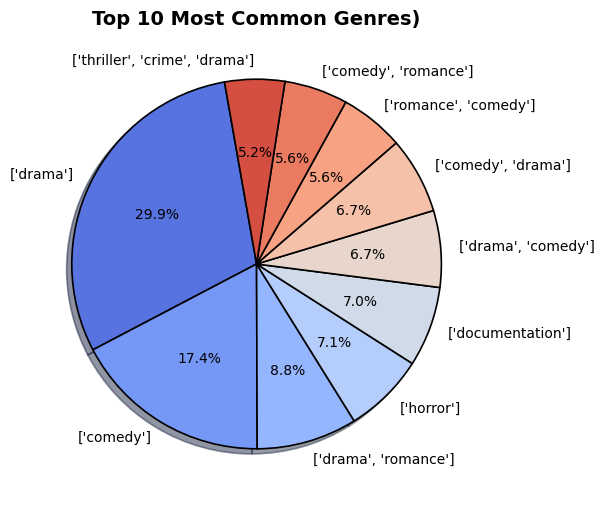

In [12]:
# Genre-wise count
top_genres = merged_df['genres'].value_counts().head(10)

# Define colors for better visual appeal
colors = sns.color_palette("coolwarm", len(top_genres))

# Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=100,shadow = True,
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})

# Set the title
plt.title("Top 10 Most Common Genres)", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

Key Insights.
1. The genre distribution shows that Drama (29.9%) and Comedy (17.4%) dominate, indicating strong audience demand but also potential market saturation.
2. Genres like Drama-Romance and Comedy-Drama bring variety by mixing different storytelling styles.
3. The presence of Documentaries (7.0%) and Horror (7.1%) shows that people are becoming more interested in real-life stories and thrilling content.
4. Niche genres like Thriller and Crime are underrepresented, limiting creative diversity. This could lead to audience fatigue and reduced innovation in storytelling. To maintain engagement, the industry should explore a broader genre mix and invest in less common but promising categories.

#### IMDB Scores Distribution.

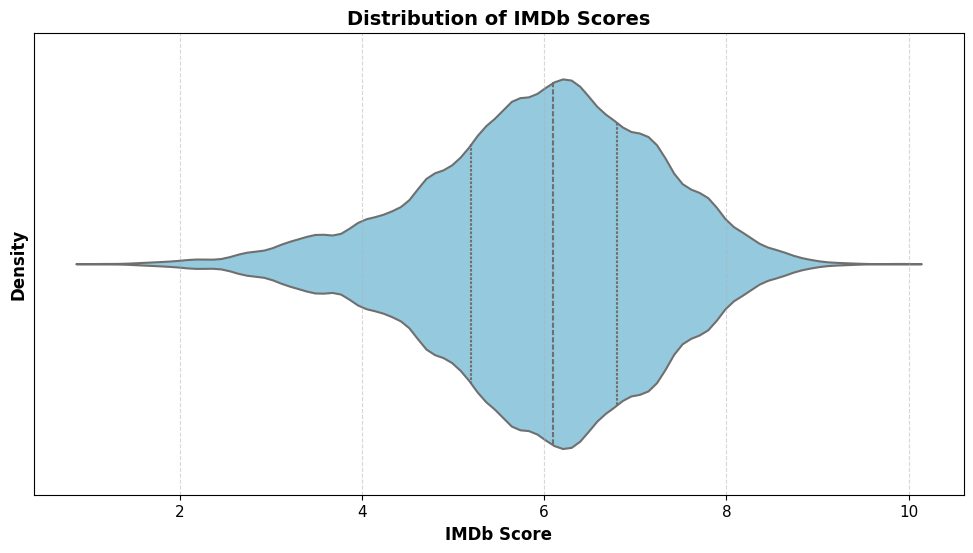

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top-rated movies
top_movies = merged_df.sort_values(by="imdb_score", ascending=False).head(124347)

# Create the figure
plt.figure(figsize=(12, 6))

# violin plot
sns.violinplot(x=top_movies["imdb_score"], inner="quartile", linewidth=1.5, color="skyblue",legend=True)

# Labels and title
plt.xlabel("IMDb Score", fontsize=12, fontweight="bold")
plt.ylabel("Density", fontsize=12, fontweight="bold")
plt.title("Distribution of IMDb Scores", fontsize=14, fontweight="bold")

# Add grid and style improvements
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks([])  # Hide y-axis for cleaner look

# Show the plot
plt.show()


Key Insights.
1. Peak Density Around 6-7: Most movies and shows receive IMDb scores in this range, making it the standard rating for content.
2. Fewer Low and High Scores: Very few titles fall below 3 or reach a perfect 10, indicating that extreme ratings are rare.
3. Symmetrical Spread: The distribution is fairly even, meaning both good and bad ratings exist, but the majority lean towards mid-to-high scores.
4. Slight Right Skew: More content has higher ratings than lower ones, suggesting audiences generally rate movies and shows favorably.
5. Wider Spread in Mid-Range: A significant number of movies have scores between 5 and 8, showing that most content falls into the "average to good" category.

#### TMDB Scores Distribution.

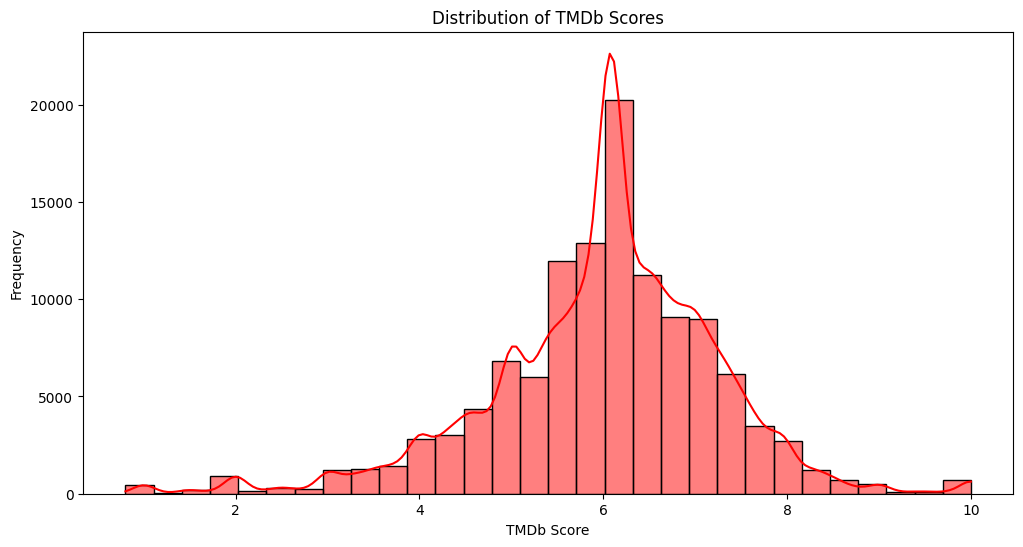

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df["tmdb_score"], bins=30, kde=True, color="red")
plt.xlabel("TMDb Score")
plt.ylabel("Frequency")
plt.title("Distribution of TMDb Scores")
plt.show()


Key Insights.
1. Peak Around 6-7: Most TMDb scores fall between 6 and 7, indicating that the majority of content receives moderate ratings.
2. Right Skewed Distribution: Fewer titles have very low or very high ratings, suggesting that extreme opinions are less common.
3. Gradual Decline Beyond 7: Ratings above 7 decrease steadily, showing that fewer titles achieve exceptionally high scores.
4. Limited Low Scores: Very few titles are rated below 3, meaning outright bad content is relatively rare.
5. High Frequency at 6: Since most ratings cluster around 6, it indicates that a large portion of content is just "okay" rather than exceptional or terrible.
6. Room for Higher-Quality Productions: The lack of high-scoring content (9-10) suggests that truly outstanding movies or shows are rare in this dataset.


#### Content Released Trend Over the Years.

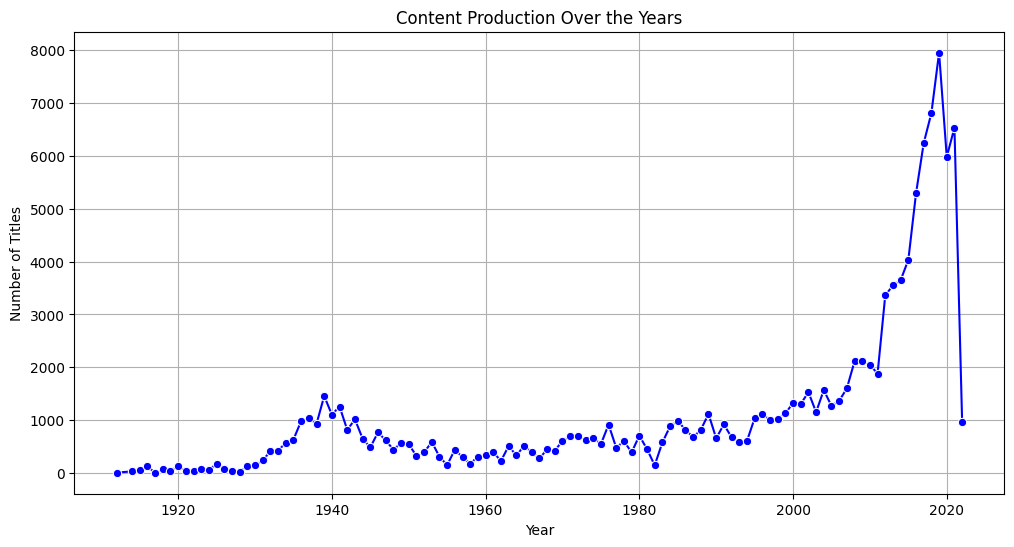

In [ ]:
## Counting titles per year
yearly_trend = merged_df["release_year"].value_counts().sort_index()

## Creating line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Content Production Over the Years")
plt.grid()
plt.show()


Key Insights.
1. Slow & Steady Growth - Content production saw a gradual rise over the decades, with some ups and downs, especially in the 1940s and 1980s.

2. Boom After 2010 - A significant surge in production occurred after 2010, likely due to streaming platforms and digital media advancements.n.

3. Peak around 2020 - The highest number of titles were produced around 2020, possibly due to the pandemic-driven demand for entertainment.

4. Sudden Drop After 2020 - Production took a sharp dip post-2020, which could be due to covid-pandemic or financial constraints.

5. Streaming Changed Everything - The massive spike in recent years shows how platforms like Netflix, Amazon Prime, and Disney+ have reshaped the entertainment industry.

#### Total number of Movies and Tv Shows

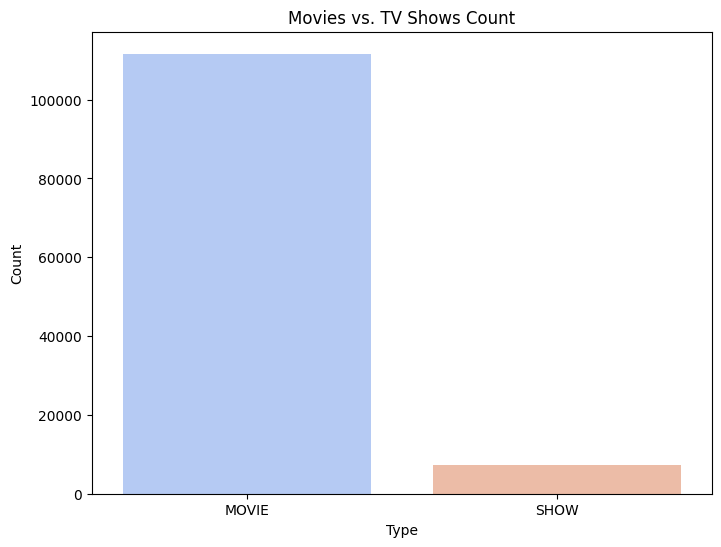

In [ ]:
## Counting movies and TV shows
type_counts = merged_df["type"].value_counts()

## Creating bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette="coolwarm", legend=False)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Movies vs. TV Shows Count")
plt.show()


**Key Insights.**
1. Movies Domination: The number of movies far exceeds TV shows.
2. TV Shows Are Fewer: A much smaller portion of content is dedicated to series.
3. Industry Focus: Films are produced at a significantly higher rate than TV series.
4. Possible Reasons: Movies require less long-term commitment than shows.

#### Distribution of Age Certifications

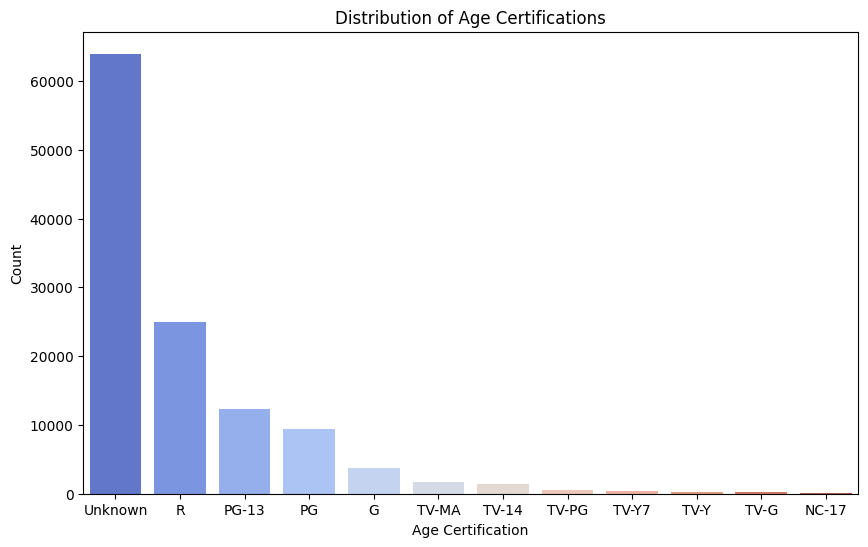

In [ ]:
## Counting age certifications
age_ratings = merged_df["age_certification"].value_counts()

## Creating bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratings.index, y=age_ratings.values, hue=age_ratings.index, palette="coolwarm", legend=False)
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.title("Distribution of Age Certifications")
plt.show()


**Key Insights**
1. High Unknown Ratings: A large portion of content lacks an age certification.
2. R-Rated Dominance: Most labeled content is rated R, indicating a strong presence of mature content.
3. Family-Friendly Content is Limited: PG, PG-13, and G-rated content exist but in much lower numbers.
4. TV Ratings Are Minimal: TV-MA, TV-14, and other television-specific ratings are rare.

####   Top 10 Highest Rated Movies

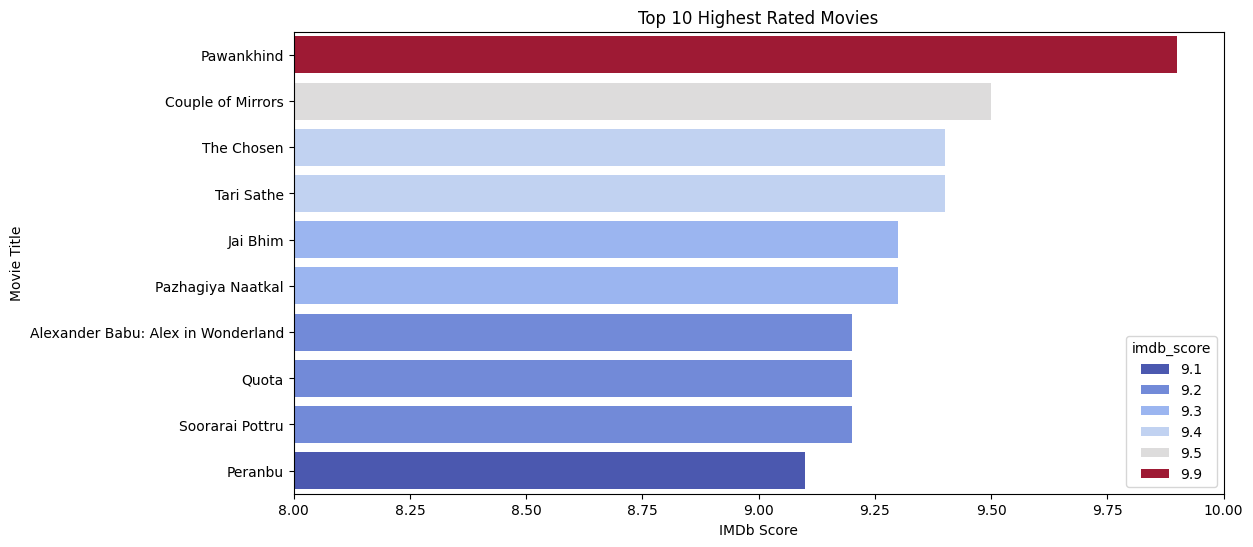

In [ ]:
# Select top-rated movies
top_movies = merged_df.groupby("title")[["title", "imdb_score"]].mean("imdb_score").sort_values("imdb_score", ascending=False).head(10)

# Create Scatter Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['imdb_score'], y=top_movies.index, hue=top_movies['imdb_score'],
                palette="coolwarm", legend=True)

# Labels and Title
plt.xlabel("IMDb Score")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest Rated Movies")
plt.xlim(8, 10)  # Focus on top ratings

# Show Plot
plt.show()

**Key Observation.**

1. Pawankhind is the highest-rated movie with an IMDb score of 9.9, significantly standing out from the rest.
2. Couple of Mirrors follows closely with a 9.5 IMDb score.
3. Other highly rated movies include The Chosen, Tari Sathe, Jai Bhim, and Pazhagiya Naatkal, all scoring between 9.3 and 9.4.
4. The lowest-rated movie in the top 10 is Peranbu, with a 9.1 IMDb score.
5. The IMDb scores are tightly packed between 9.1 and 9.9, indicating that all these movies are exceptionally well-received.

 Country-wise Content Production (Bar Chart)

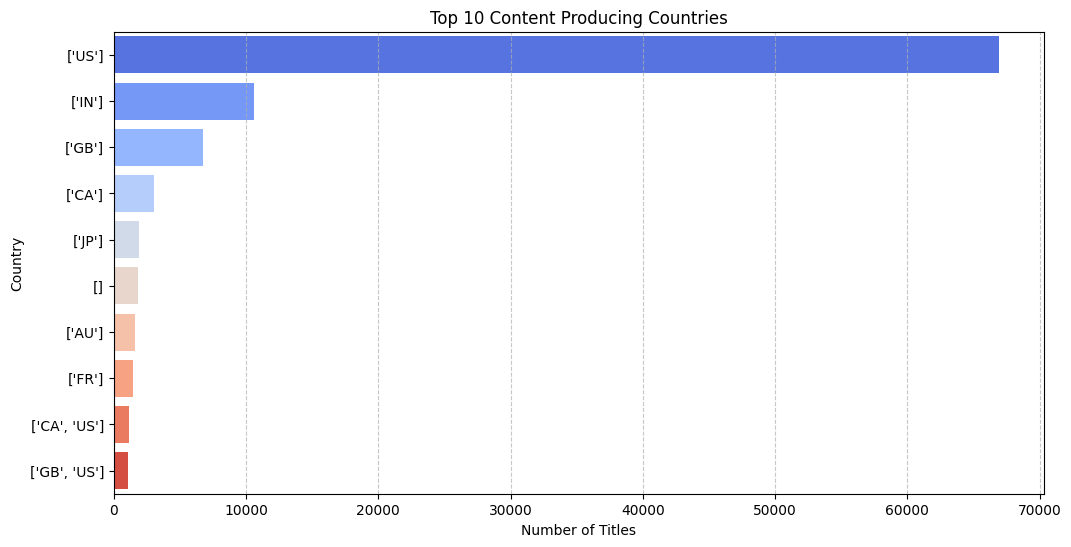

In [ ]:
# Get the top 10 content-producing countries
top_countries = merged_df["production_countries"].value_counts().head(10)

# Generate a smooth gradient color palette
colors = sns.color_palette("coolwarm", n_colors=len(top_countries))

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_countries.values, y=top_countries.index)

# Apply the gradient colors manually to each bar
for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)

# Labels and title
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Content Producing Countries")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Key Observations.**

1. The United States dominates content production, contributing the most number of titles.
2. Other leading contributors include India, United Kingdom, Canada, and Japan.
3. Some entries have missing or unspecified production country data.
4. A few movies/shows are joint productions, such as Canada and US or UK and US.

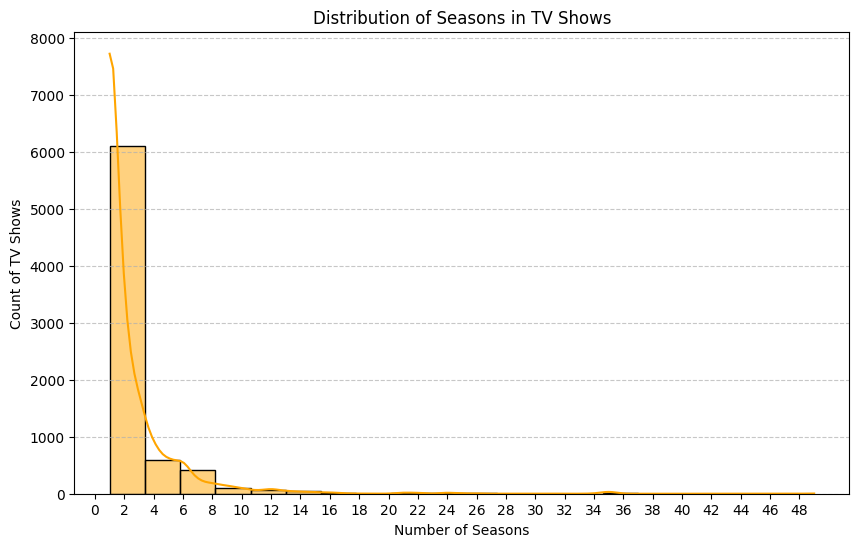

In [ ]:
# Drop NaN values and filter only TV shows
df_tv = merged_df.dropna(subset=['seasons'])
df_tv = df_tv[df_tv['type'] == 'SHOW']  # Filter TV shows only

plt.figure(figsize=(10, 6))

# Histogram with KDE (Kernel Density Estimate) for smooth distribution
sns.histplot(df_tv['seasons'], bins=20, kde=True, color="orange", edgecolor="black")

# Enhancing the visualization
plt.xticks(range(0, int(df_tv['seasons'].max()) + 1, 2))  # Tick marks at intervals
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.title("Distribution of Seasons in TV Shows")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Key Insights**
1. Most TV shows have only one or two seasons, making short-lived series More comman.
2. Very few shows go beyond five seasons, and even fewer reach double digits.
3. A small number of exceptionally long-running shows stand out but are rare.
4. The sharp decline after the first few seasons suggests that many shows get canceled early.

#### Movie Runtime Distribution.

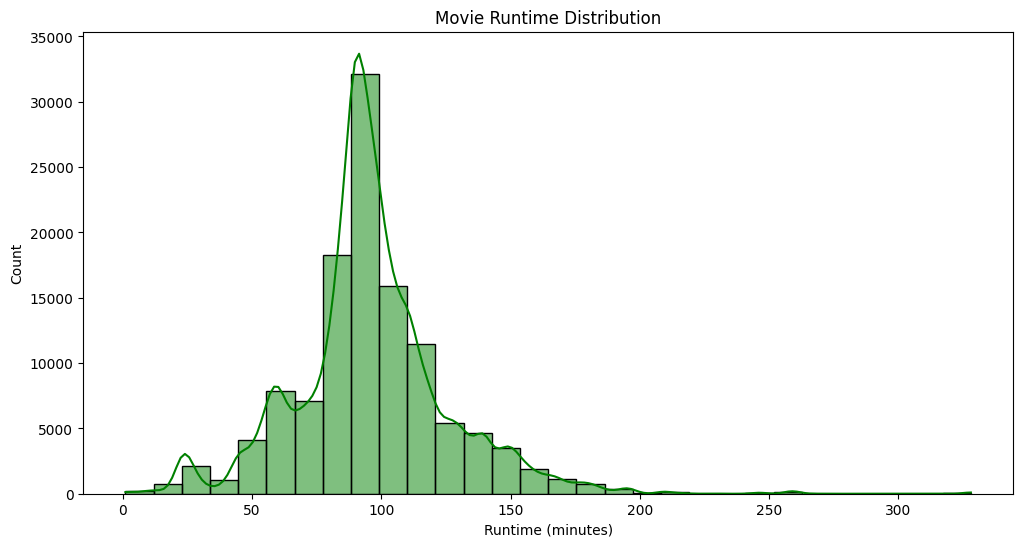

In [16]:
## Creating histogram
plt.figure(figsize=(12, 6))
sns.histplot(merged_df["runtime"], bins=30, kde=True, color="green")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Movie Runtime Distribution")
plt.show()



**Key Insights.**
1. Most Movies Fall in the 90-120 Minute Range - The highest peak in the distribution suggests that the majority of films have a runtime between 90 and 120 minutes, aligning with standard feature-length films.
2. Short Films and Long Epics Are Less Common - There are significantly fewer movies under 60 minutes (short films) and over 150 minutes (long epics), making these outliers.
3. Slight Right Skew - The distribution is slightly right-skewed, meaning some movies have exceptionally long runtimes, but they are relatively rare.
4. Multiple Small Peaks for Shorter Films - There are minor peaks around 30-60 minutes, possibly representing documentaries, animated films, or indie productions.


#### Trends in IMDb and TMDb Ratings Over the Decades.

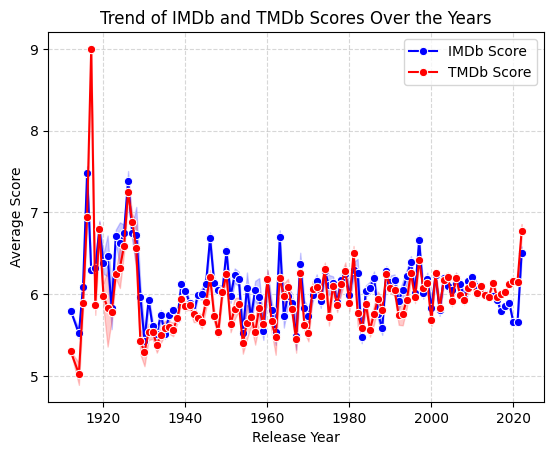

In [19]:
sns.lineplot(x="release_year", y="imdb_score", data=merged_df, label="IMDb Score", marker="o", color="blue")
sns.lineplot(x="release_year", y="tmdb_score", data=merged_df, label="TMDb Score", marker="o", color="red")

## Labels and title
plt.xlabel("Release Year")
plt.ylabel("Average Score")
plt.title("Trend of IMDb and TMDb Scores Over the Years")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

## Show the plot
plt.show()


**Key Insights.**
1. Big Swings in the Early Years - Movies from the 1920s and 1930s had wildly different ratings, likely due to the evolving film industry and fewer releases.
2. More Stable After the 1950s -  From the 1950s onward, ratings became more consistent, mostly ranging between 5.5 and 7 on average.
3. Slightly Higher Ratings in Recent Years - Movies from the 2000s and 2010s show a slight upward trend, possibly due to better production quality or changing audience preferences.
4. IMDb vs. TMDb Differences - IMDb ratings (blue) fluctuate more, while TMDb ratings (red) are smoother, suggesting a different way of scoring on each platform.
5. Recent Spikes - Some recent movies stand out with high ratings, possibly reflecting popular or critically acclaimed films.

#### Imdb Scores vs Number of Votes

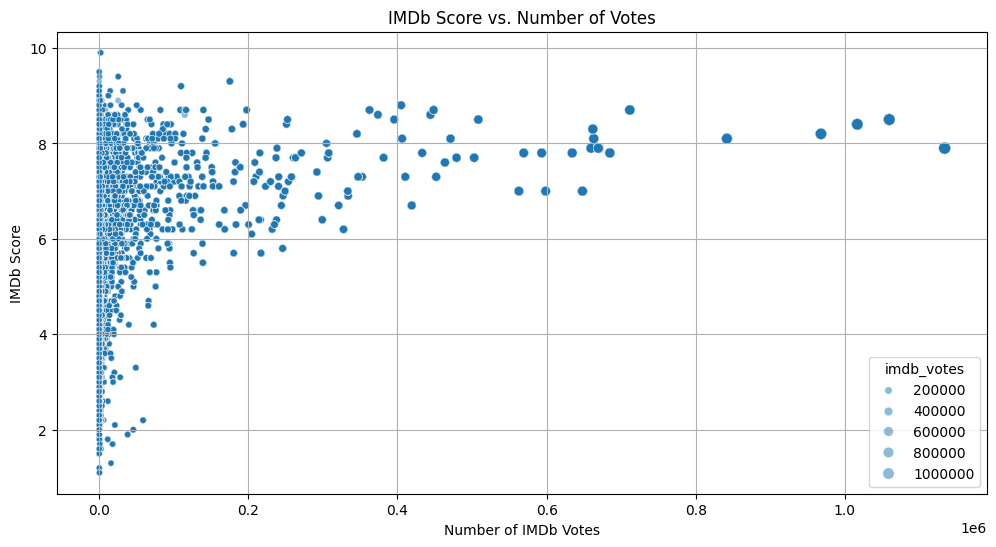

In [ ]:
## Creating bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df["imdb_votes"], y=merged_df["imdb_score"], size=merged_df["imdb_votes"], alpha=0.5)
plt.xlabel("Number of IMDb Votes")
plt.ylabel("IMDb Score")
plt.title("IMDb Score vs. Number of Votes")
plt.grid()
plt.show()


**Key Insights.**
1. Popular Movies Tend to Have High Ratings - Movies with hundreds of thousands to millions of votes usually have IMDb scores between 7 and 9, meaning widely watched films are often well-received.
2. Obscure Movies Can Be a Hit or Miss - Films with fewer votes have wildly different ratings, ranging from terrible (1-3) to amazing (8-10). This suggests niche films can be either hidden gems or complete flops.
3. Most Movies Get Little Attention - There’s a huge cluster of films with very few votes, meaning most movies don’t get a lot of audience engagement.
4. A Few Movies Dominate - The rare films with over a million votes are likely blockbusters or classics, and they almost always have strong ratings (7+), reinforcing their broad appeal.

#### Trend of Movies Released Over the Decades.

<ipython-input-22-f90b936fa6ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette="coolwarm")


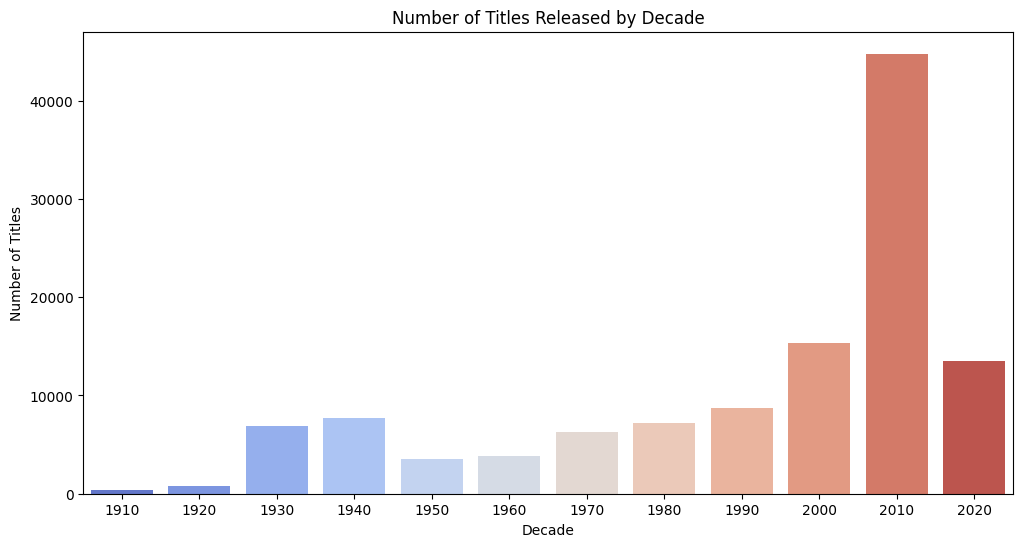

In [ ]:
## Creating a new column for decade
merged_df["decade"] = (merged_df["release_year"] // 10) * 10

## Counting number of titles per decade
decade_counts = merged_df["decade"].value_counts().sort_index()

## Creating bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette="coolwarm")
plt.xlabel("Decade")
plt.ylabel("Number of Titles")
plt.title("Number of Titles Released by Decade")
plt.show()


**Key Insights.**
1. Explosive Growth in Content - The number of titles released skyrocketed, especially after the 2000s, with the 2010s seeing the highest number of releases ever.
2. Early Film Industry Was Small - Before the 1950s, the number of releases was relatively low, reflecting the early years of cinema when production was expensive and technology was limited.
3. Dips and Surges - Some decades, like the 1950s and 1960s, saw a decline in releases, possibly due to shifts in the film industry, competition from television, or economic factors.
4. Streaming Boom in the 2010s - The massive spike in the 2010s likely reflects the rise of streaming services like Netflix, Amazon Prime, and Hulu, which led to an explosion of content production.
5. Drop in the 2020s - The decline in releases after 2020 could be due to the COVID-19 pandemic, which disrupted production and delayed many projects.

#### Directors with Highest Rated Movies.

<ipython-input-56-ca0798421472>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


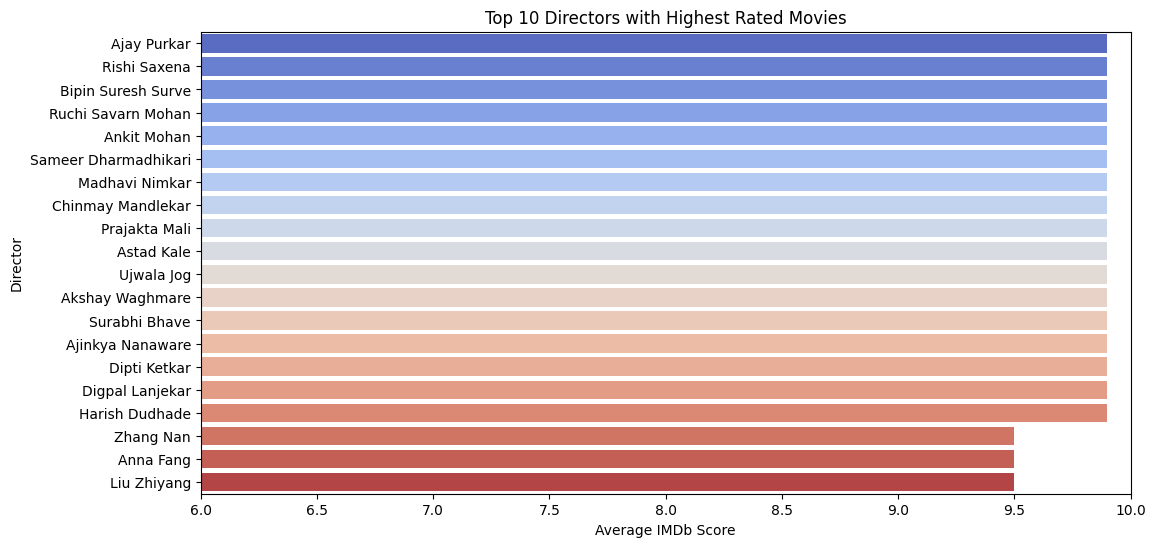

In [ ]:
## Grouping by directors and calculating mean IMDb score
top_directors = merged_df.groupby("name")["imdb_score"].mean().sort_values(ascending=False).head(20)

## Creating bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.xlabel("Average IMDb Score")
plt.ylabel("Director")
plt.title("Top 10 Directors with Highest Rated Movies")
plt.xlim(6, 10)
plt.show()


**Key Insights.**
1. Top-Rated Directors - The highest-rated movies belong to Liu Zhiyang, Anna Fang, and Zhang Nan, with IMDb scores close to 9.5 or higher, indicating consistent excellence in their films.
2. Strong Competition - Many directors on the list have ratings above 8.0, showing a high standard in filmmaking.
3. Diversity in the List - The chart includes both well-known and emerging directors, reflecting a mix of experienced filmmakers and rising talents.
4. IMDb Score Distribution - The range of ratings spans from around 6.0 to nearly 10.0, showing that even within the highest-rated category, there’s variation in how audiences perceive these films

#### Popularity Vs Ratings.

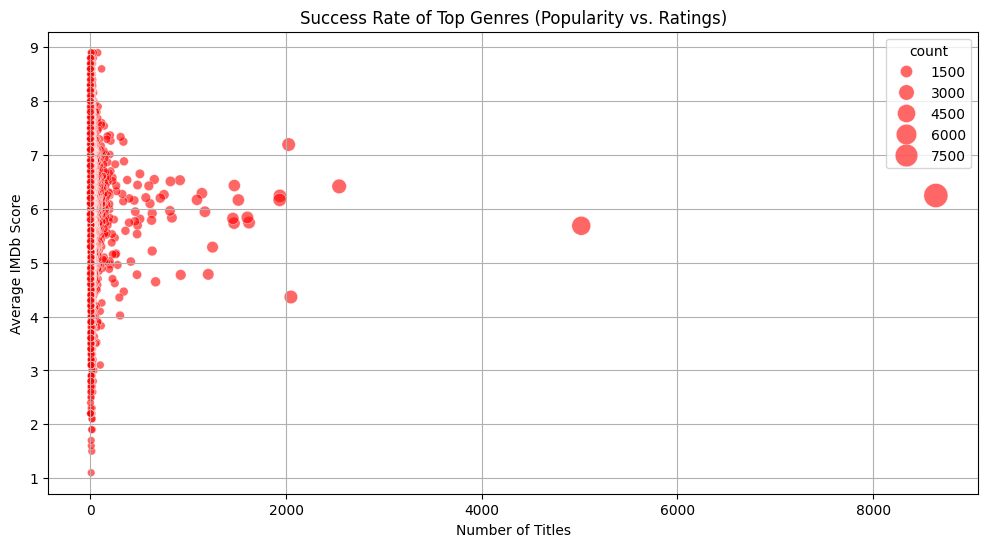

In [ ]:
## Calculating average IMDb score per genre
genre_success = merged_df.explode("genres").groupby("genres").agg({"imdb_score": "mean", "genres": "count"})
genre_success.columns = ["avg_rating", "count"]
genre_success = genre_success.sort_values(by="count", ascending=False).head(124347)

## Creating scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=genre_success["count"], y=genre_success["avg_rating"], size=genre_success["count"],
                sizes=(30, 300), color="red", alpha=0.6)
plt.xlabel("Number of Titles")
plt.ylabel("Average IMDb Score")
plt.title("Success Rate of Top Genres (Popularity vs. Ratings)")
plt.grid()
plt.show()


**Key Insights**
1. Most genres cluster at the lower end of popularity, meaning they have fewer titles but still show a wide range of IMDb scores.
2. A few genres dominate in volume, with one genre having nearly 9,000 titles but an average rating around 6.
3. High ratings aren’t necessarily linked to popularity - Some less common genres have average scores above 7, while more popular genres hover around 6.
4. Some outliers stand out - A couple of genres with 2,000+ titles have managed to maintain an IMDb score of around 7.
5. More titles don’t always mean better quality, as seen in the biggest genres that lean towards an average rating rather than excellence.

#### Movie Runtime vs IMDb Scores.

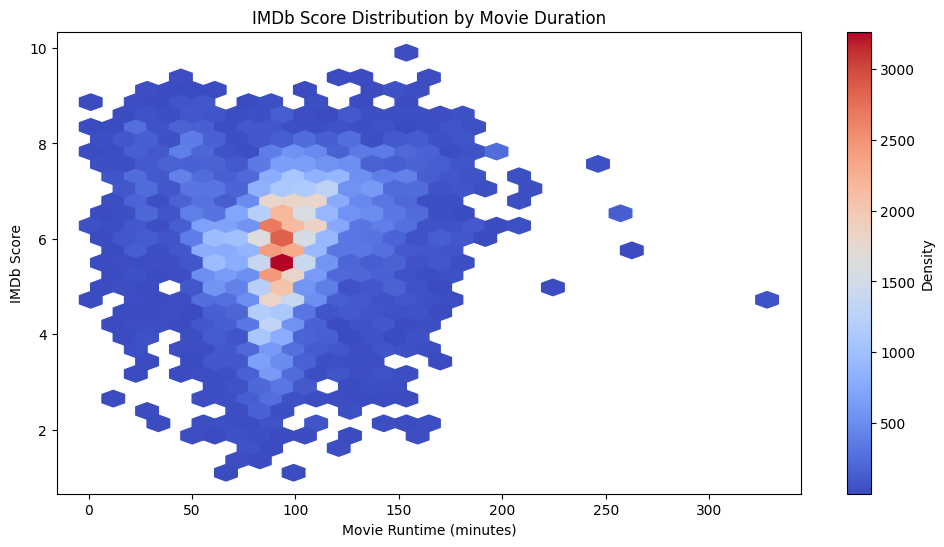

In [21]:
## Creating hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(merged_df["runtime"], merged_df["imdb_score"], gridsize=30, cmap="coolwarm", mincnt=1)
plt.colorbar(label="Density")
plt.xlabel("Movie Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.title("IMDb Score Distribution by Movie Duration")
plt.show()


**Key Insight**
1. Most movies fall within the 80-120 minute range, and this is where IMDb scores are most densely concentrated.
2. The highest density of movies has IMDb scores between 5 and 7, indicating an average rating.
3. Short and extremely long movies are less common, but their ratings vary widely.
4. Movies longer than 150 minutes tend to have more scattered ratings, suggesting they can be either highly rated epics or niche films.
5. Some very short movies (under 30 minutes) have a broad range of ratings, but they are less frequent in the dataset.

### Conclusions.

#### ***Key Findings:***

#### Movie Releases Over Time:
1. Steady Growth in Movie Production - The number of movies released has increased significantly over the decades, especially in the 2000s and 2010s.
2. Recent Decline in Releases - A drop in movie production in the 2020s, possibly due to external factors like the COVID-19 pandemic and shifts toward streaming platforms.
3. Rise of Streaming Services - The emergence of platforms like Netflix, Prime Video, and Disney+ has changed traditional movie production and distribution patterns.

#### Genre Popularity vs. Ratings:
1. Some genres are heavily produced but do not always achieve high ratings.
2. Quality-over-quantity approach can be more beneficial for studios focusing on high audience satisfaction.
3. IMDb Scores Favor Well-Balanced Movies - Most successful films maintain a 90-120 minute runtime with a strong storyline and high engagement.
4. High Ratings in Thought-Provoking Genres - Documentaries, thrillers, and biopics tend to receive better audience appreciation.
5. Directors Influence Ratings - Certain directors consistently produce high-rated movies, which makes them valuable assets for studios.
6.  Horror and Comedy Are Hit or Miss - These genres have a mix of extremely high and very low-rated movies, showing that execution matters more than volume

#### Movie Duration vs. IMDb Scores:
1. Most movies fall between 90-120 minutes, and this range shows a higher density of well-rated films.
2. Extremely short or very long movies tend to be more polarizing in ratings.

#### Age Certification (Movie Ratings by Audience Group):
1. Family-Friendly Films Maintain High Ratings - G and PG-rated movies generally receive better reception due to universal appeal.
2. R-Rated Movies Show Mixed Performance - Some R-rated movies perform exceptionally well (dramas, thrillers), while others struggle (excessive action or horror).
3. Parental Guidance Categories Are Expanding - More PG-13 movies are being produced to balance wider audience reach with engaging content




#### Business Solutions & Industry Recommendations.
#### For Employers (Film Studios, Streaming Platforms, Production Companies):
* Quality Over Quantity - Rather than flooding the market with content, focus on producing high-quality movies that resonate with audiences, especially in trending genres.
* Optimized Runtime - Aim for the 90-120-minute range, as this aligns with viewer preferences and maximizes engagement.
* Strategic Director Partnerships - Invest in directors who have a track record of consistently high-rated movies to enhance audience trust and brand value.
* Smart Investment Decisions - Allocate resources wisely by focusing on genres that not only attract high ratings but also maintain strong audience engagement over time.

#### For Employees (Filmmakers, Directors, Writers, Industry Professionals):
* Build Meaningful Collaborations - Working with acclaimed directors and production houses increases visibility and career growth.
* Prioritize Quality Over Volume - A few highly-rated projects can have a stronger career impact than multiple average-rated films.
* Specialize in High-Performing Genres - Understanding which genres perform well can help professionals choose projects that have a better chance of success.
* Adapt to Industry Trends - With streaming platforms reshaping the industry, professionals should be open to digital-first projects alongside traditional cinema.

#### For Researchers.
* Track Industry Trends - The shifts in movie production rates reflect broader changes in audience preferences, technology, and external factors (e.g., pandemic effects).
* Analyze Streaming vs. Theatrical Impact - The rapid rise of streaming services is influencing how films are made, distributed, and consumed.
* Study Audience Behavior - IMDb ratings and engagement trends offer valuable insights into what elements of storytelling, direction, and production quality matter most.
* Forecast Future Developments - Examining how movie ratings, genres, and audience preferences evolve can help predict future industry trends.

#### Future Research Directions.
* Audience Behavior & Engagement - Explore how storytelling, streaming habits, and online reviews shape movie success.
* Content Evolution - Analyze the impact of streaming, short-form content, and AI-driven storytelling on the industry.
* Global & Demographic Trends - Investigate regional preferences, generational differences, and the role of diversity in movie reception.
* Data-Driven Insights - Utilize AI and predictive modeling to forecast movie success and optimize filmmaking strategies.